# Programming for Data Science Project
## *Where Should I Live?*

This project explores a dataset of European cities with demographic, economic, and cost‑of‑living indicators to help answer the practical question: *where would it be most attractive to live under different priorities?*
The following sections walk through data cleaning, exploratory analysis, and targeted queries that address the assignment questions on countries, languages, update dates, economic indicators, and overall city attractiveness.


In [65]:
import re
import datetime as dt
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
cities = pd.read_csv('data/city_data.csv', sep='|', index_col=0, header=1)
cities_og = cities.copy(False)
cities

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00


---

## 1. Handling missing values and duplicate records


Before conducting any analysis, the dataset is validated for structural issues such as missing values, inconsistent formatting, and duplicate rows.

- **Duplicate Records**: Duplicate city–country entries (e.g., Berlin, Germany and Malaga, Spain) are removed to prevent skewed counts and repeated observations.

- **Missing Values**:

    - Critical variables (e.g., GDP per Capita, Unemployment Rate, Main Spoken Languages) are imputed using forward/backward fill, medians.

    - Columns with excessive missing values (Average Price Groceries) are removed.

- **Column Cleanup**:
Column names with trailing spaces or overly long descriptions are standardized (e.g., Working Age Population, Heat Stress Days).

- **Index Fixing**:
Mixed formats (“City, Country” vs. “Country, City”) are unified and converted into a structured MultiIndex with separate Country and City levels.

This ensures a consistent, analysis-ready dataset before exploring any research questions.

-----

The column 'Working Age Population ' had a space at the end and 'Days of very strong heat stress' was a pain to use, so we renamed both.

In [66]:
cities.rename(columns={'Working Age Population ': 'Working Age Population', 'Days of very strong heat stress': 'Heat Stress Days', 'Avgerage Rent Price':'Average Rent Price'}, inplace=True)
cities

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Heat Stress Days,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00


**Handling Missing Values**

In [67]:
cities.isnull().sum()

Population Density          1
Population                  0
Working Age Population      1
Youth Dependency Ratio      0
Unemployment Rate           1
GDP per Capita              1
Heat Stress Days            0
Main Spoken Languages       1
Average Monthly Salary      0
Average Rent Price          0
Average Cost of Living      0
Average Price Groceries    80
Last Data Update            0
dtype: int64

In [68]:
missing1val = ['Main Spoken Languages', 'Population Density', 'Working Age Population']
for column in missing1val:
    missing_indices = cities[cities.loc[:, column].isnull()].any(axis=1).index.tolist()
    print(cities.loc[missing_indices, column])

City
Dusseldorf, Germany    NaN
Name: Main Spoken Languages, dtype: object
City
Valencia, Spain   NaN
Name: Population Density, dtype: float64
City
Dusseldorf, Germany   NaN
Name: Working Age Population, dtype: float64


We filled in the missing value in the column 'Working Age Population' by taking the value from the previous entry (since this city will also be from Germany) To fill in the GDP column we use the average value and for 'Population Density'. And to fill 'Population Density' we will also take the neighboring value that refers to the same country

In [69]:
cities['Working Age Population']=cities['Working Age Population'].ffill()
cities['GDP per Capita']=cities['GDP per Capita'].fillna(cities['GDP per Capita'].median())
cities['Population Density']=cities['Population Density'].bfill()

We also filled in the missing values in columns 'Unemployment Rate' and 'Main Spoken Languages'with data that we can find publicly available on the Internet

In [70]:
cities.loc[cities['Unemployment Rate'].isnull(), 'Unemployment Rate'] = 10.4 #Source: https://ec.europa.eu/eurostat/databrowser/bookmark/ab2f73aa-b0e7-416e-84f9-4ced10a5d68e?lang=en&createdAt=2025-09-23T10:11:50Z
cities.loc[cities['Main Spoken Languages'].isnull(), 'Main Spoken Languages'] = 'German'

We deleted the column that has almost no entries (and it's impossible to fill it out), and therefore it will be useless

In [71]:
cities.drop(['Average Price Groceries'], axis=1, inplace=True)

Then we changed the data type to numeric in the age column.

In [72]:
cities['Working Age Population']=cities['Working Age Population'].astype(int)

Removing duplicates

In [73]:
city_names = cities.index
duplicates = cities[city_names.duplicated()]
cities.drop_duplicates(inplace=True)
duplicates.index

Index(['Berlin. Germany', 'Malaga, Spain'], dtype='object', name='City')

We handled two formatting/spelling mistakes manually because it would have been a waste of time to do it any other way.

In [74]:
cities.rename({'Greece, Athens':'Athens, Greece', 'Gent, Belgium':'Ghent, Belgium'}, inplace=True)

Standardizing inconsistent index strings in the dataset and converts them into a clean, structured MultiIndex with separate Country and City levels. By unifying the format and splitting each entry into two explicit index components, the dataset becomes easier to filter, group, merge, and analyze in all subsequent steps

In [75]:
new_index = []
for row in cities.index:
    temp = re.split(r"[;.,]", row)
    new_index.append((temp[1].strip(),temp[0].strip()))
m_index = pd.MultiIndex.from_tuples(new_index, names=['Country', 'City'])
cities = cities.set_index(m_index)
cities

Population Density  Population  Working Age Population  \
Country City                                                                 
Austria Vienna                   310.0     2983513                 2018818   
        Salzburg                 243.0      375489                  250472   
Belgium Brussels                 681.0     3284548                 2137425   
        Antwerp                  928.0     1139663                  723396   
        Ghent                    552.0      645813                  417832   
...                                ...         ...                     ...   
Sweden  Stockholm                334.0     2344124                 1534225   
        Gothenburg               245.0     1037675                  672152   
        Malmo                    368.0      680335                  436271   
Turkiye Ankara                  1922.0     4843511                 3417691   
        Adana                    552.0     1074543                  718256   

                    Youth Dependency Ratio  Unemployment Rate  GDP per Capita  \
Country City                                                                    
Austria Vienna                        20.1               10.2         55770.0   
        Salzburg                      20.3                3.0         66689.0   
Belgium Brussels                      27.5               10.7         62500.0   
        Antwerp                       27.7                6.2         57595.0   
        Ghent                         24.8               10.4         53311.0   
...                                    ...                ...             ...   
Sweden  Stockholm                     28.5                6.2         70950.0   
        Gothenburg                    28.2                6.3         49588.0   
        Malmo                         29.4                9.2         44387.0   
Turkiye Ankara                        30.0               14.4         38916.0   
        Adana                         37.8               12.2         19945.0   

                    Heat Stress Days              Main Spoken Languages  \
Country City                                                              
Austria Vienna                     3  German, English, Turkish, Serbian   
        Salzburg                   0                             German   
Belgium Brussels                   3     French, Dutch, Arabic, English   
        Antwerp                    3              Dutch, French, Arabic   
        Ghent                      2                      Dutch, French   
...                              ...                                ...   
Sweden  Stockholm                  0                   Swedish, English   
        Gothenburg                 0                   Swedish, English   
        Malmo                      0                   Swedish, English   
Turkiye Ankara                     3                            Turkish   
        Adana                     59                            Turkish   

                    Average Monthly Salary  Average Rent Price  \
Country City                                                     
Austria Vienna                        2500                1050   
        Salzburg                      3200                1100   
Belgium Brussels                      3350                1200   
        Antwerp                       2609                 900   
        Ghent                         2400                 827   
...                                    ...                 ...   
Sweden  Stockholm                     2700                1400   
        Gothenburg                    2500                1200   
        Malmo                         2400                1100   
Turkiye Ankara                         900                 450   
        Adana                          750                 350   

                    Average Cost of Living     Last Data Update  
Country City                                      

---

## 2. Country and language overview

This section answers high-level questions about country representation, linguistic diversity, and the overall coverage of the dataset.

### **a) – Which country appears most frequently, and how many cities does it include?**

Germany occurs most often with 10 cities, indicating the strongest representation in the dataset.

### **b) – How many cities are included in total, and how many belong to Greece?**

There are 84 cities overall, of which 2 are located in Greece.
This helps gauge regional balance and potential analysis bias.

### **c) – What are the least and most spoken languages?**

To analyze linguistic diversity, the Main Spoken Languages field is normalized by splitting multi-language entries into individual tokens:

Least common languages: 13 languages that appear only once (e.g., Latvian, Maltese, Estonian, Scots Gaelic, Slovene).
Most common languages: English, German, Turkish.

A frequency plot illustrates how strongly certain languages dominate European cities.

---

To understand the distribution of cities across countries, we count how many times each country appears in the dataset. This helps reveal which countries dominate the sample and therefore might have a stronger influence on later analyses

In [76]:
unique_countries = cities.index.get_level_values('Country')
unique_countries.value_counts().sort_values(ascending=False).head(1)

Country
Germany    10
Name: count, dtype: int64

---

We examined the total number of unique cities across all countries and zoom in on Greece to see how many Greek cities are included. This provides a quick sense of how well different regions are covered, which matters when comparing living conditions or economic indicators between countries.

In [77]:
nr_cities = len(cities)
nr_greek_cities = len(cities.loc['Greece'])
print(f'Nr of cities in total: {nr_cities} | Nr of greek cities: {nr_greek_cities}')

Nr of cities in total: 84 | Nr of greek cities: 2


---

To analyse linguistic diversity by normalising the Main Spoken Languages field and counting how often each language appears. This helps reveal which languages dominate European cities and which are rare

In [78]:
cities['Main Spoken Languages']=cities['Main Spoken Languages'].apply(lambda lang: lang.split(', '))
main_langs = cities.explode('Main Spoken Languages').reset_index()
main_langs = main_langs['Main Spoken Languages'].apply(lambda row: row.strip())
main_langs.value_counts().tail(13)

Main Spoken Languages
Latvian              1
Maltese              1
Serbian              1
Romanian             1
Slovak               1
Scots Gaelic         1
Luxembourgish        1
Scots                1
Bengali              1
Estonian             1
Spanish;Valencian    1
Catalan              1
Slovene              1
Name: count, dtype: int64

We also constructed a graph for clarity
and to understand: what is the most popular language and by how much?

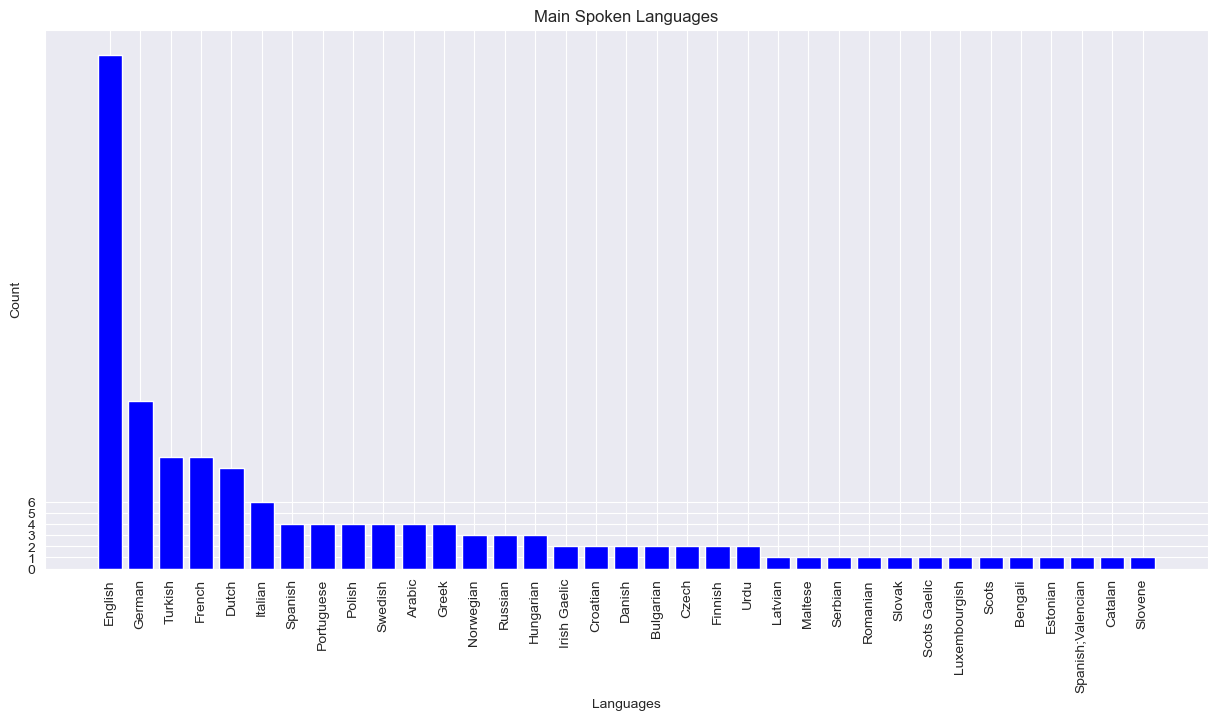

In [79]:
labels = main_langs.value_counts().index
lng_cnt = main_langs.value_counts()
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(labels, lng_cnt, width=0.8, color='b')
ax.set_yticks([_ for _ in range(0,7)])
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Main Spoken Languages')
plt.xticks(rotation=90)
plt.show()

---

## 3. Data update schedule

This section evaluates the freshness of the dataset based on the Last Data Update column.

### **a) – Which cities require an update (last updated before April 2023)?**

Cities older than April 2023 include:
Basel, Munich, Frankfurt am Main, Lyon, Venice, Gothenburg.
These records should be updated under the assignment criteria.

### **b) –  How many days ago was the last update? On what day, month, and year did it occur?**

The latest update corresponds to Oslo, on 12 December 2024.
This timestamp provides the benchmark for measuring how current the dataset is.

---

The Last Data Update column indicates when each city’s information was last refreshed. To find entries that need revisiting, we filter for cities whose last update occurred before April 2023; these cities would require an update under the assignment specification, since their information is more than a year old relative to the most recent records.

In [80]:
cities['Last Data Update']=pd.to_datetime(cities['Last Data Update'])

In [81]:
cities[cities['Last Data Update']<'2023-04']

Population Density  Population  \
Country     City                                                
Switzerland Basel                           793.0      550152   
Germany     Munich                          529.0     2907752   
            Frankfurt am Main               631.0     2710501   
France      Lyon                          10909.0      520774   
Italy       Venice                          852.0      557748   
Sweden      Gothenburg                      245.0     1037675   

                               Working Age Population  Youth Dependency Ratio  \
Country     City                                                                
Switzerland Basel                              358020                   21.50   
Germany     Munich                            1955041                   21.10   
            Frankfurt am Main                 1791435                   22.00   
France      Lyon                               365824                   27.31   
Italy       Venice                             347781                   19.30   
Sweden      Gothenburg                         672152                   28.20   

                               Unemployment Rate  GDP per Capita  \
Country     City                                                   
Switzerland Basel                            5.3         94826.0   
Germany     Munich                           2.1         83965.0   
            Frankfurt am Main                3.2         69372.0   
France      Lyon                             6.9         46226.0   
Italy       Venice                           6.1         39681.0   
Sweden      Gothenburg                       6.3         49588.0   

                               Heat Stress Days      Main Spoken Languages  \
Country     City                                                             
Switzerland Basel                             5  [German, English, French]   
Germany     Munich                            1          [German, English]   
            Frankfurt am Main                 6          [German, English]   
France      Lyon                             11                   [French]   
Italy       Venice                            6                  [Italian]   
Sweden      Gothenburg                        0         [Swedish, English]   

                               Average Monthly Salary  Average Rent Price  \
Country     City                                                            
Switzerland Basel                                6366                2500   
Germany     Munich                               3540                1500   
            Frankfurt am Main                    3800                1300   
France      Lyon                                 2300                1200   
Italy       Venice                               1400                1150   
Sweden      Gothenburg                           2500                1200   

                               Average Cost of Living Last Data Update  
Country     City                                                        
Switzerland Basel                                4239       2023-01-19  
Germany     Munich                               2550       2023-03-16  
            Frankfurt am Main                    2350       2023-02-04  
France      Lyon                                 1800       2023-03-31  
Italy       Venice                               1500       2023-03-23  
Sweden      Gothenburg                           2100       2023-03-10

---

We compute how long it has been since the dataset was last updated overall by taking the maximum `Last Data Update` value and comparing it to the current date.
This gives both the exact day, month, and year of the most recent update, providing a concise view of the dataset’s freshness.

In [82]:
cities['Last Data Update'].sort_values(ascending=False)

Country         City             
Norway          Oslo                2024-12-12
Czechia         Prague              2024-12-05
Luxembourg      Luxembourg          2024-11-29
Germany         Cologne             2024-11-23
United Kingdom  Leeds               2024-11-03
                                       ...    
Italy           Venice              2023-03-23
Germany         Munich              2023-03-16
Sweden          Gothenburg          2023-03-10
Germany         Frankfurt am Main   2023-02-04
Switzerland     Basel               2023-01-19
Name: Last Data Update, Length: 84, dtype: datetime64[ns]

To find out how many days ago this update was done we did simple subtraction between todays date and the last recorded date as it is the simplest and most concise solution.

In [83]:
today= dt.datetime.today()
last_record = cities.loc[('Norway','Oslo'), 'Last Data Update']
delta = today - last_record
f"{delta.days} days since last update"

'370 days since last update'

---

## 4. Economic comparisons

This section investigates the macroeconomic interplay between job availability and economic prosperity.

### **a) – What is the relationship between unemployment rate and GDP per capita?**

**Visual Exploration:**
Two vertically aligned bar charts followed by a jointplot compare unemployment rates and GDP per capita per city. The visual pattern suggests a negative relationship, cities with higher GDP per capita tend to have lower unemployment.

**Statistical Validation:**
A joint distribution was intended to confirm the trend using hex bins, aiming to show whether the inverse relationship holds numerically.

The combined visual and statistical approach indicates a meaningful negative correlation between economic strength and unemployment.

### **b) - Salary–Cost of Living Gap: Where Does a Salary Go the Furthest?**

This subsection evaluates how much disposable income residents keep after covering essential living costs.
By subtracting the Average Cost of Living from the Average Monthly Salary, we compute a salary–cost gap for every city.

**City-level analysis**

A larger positive gap means significantly more purchasing power and financial comfort.
We rank all cities by this gap and visualize the top five cities with the strongest surplus using a vertical income–spending line chart.

   - The most financially favorable cities are: Basel, Zurich, Geneva, Tampere, and Helsinki.

These cities combine high wages with living costs that, although elevated, remain proportionally much lower than income—resulting in substantial disposable income.

**Country-level analysis**

We then aggregate the gap at the country level by averaging it across all cities within each country.
Two bar charts highlight:

   - Countries where spending exceeds income: Portugal, Greece, Slovakia, Turkey, Poland
These countries show an average negative gap, meaning salaries are insufficient to cover basic living costs.

   - Countries with the smallest positive salary–cost gap: Romania, Poland, Turkey, Slovenia, Slovakia
These locations offer only minimal financial comfort—income barely exceeds spending.

This multi-level analysis provides a clear picture of economic pressure points and highlights the regions where everyday life can be financially tight.
Identifying this group of cities helps highlight the most economically resilient and attractive locations, useful for relocation decisions or further socio-economic analysis.

### **c) -Selecting the Best City Under Specific Constraints**

To simulate a real-world decision scenario, we search for cities that meet three practical conditions simultaneously:  

Average Monthly Salary > €2000  
Average Cost of Living < €1600

We filter the dataset accordingly and compare the remaining candidates on additional indicators such as unemployment rate and GDP per capita.
A bar chart visualizes the short-listed cities by unemployment rate, highlighting which cities combine strong finances with job-market stability.

---

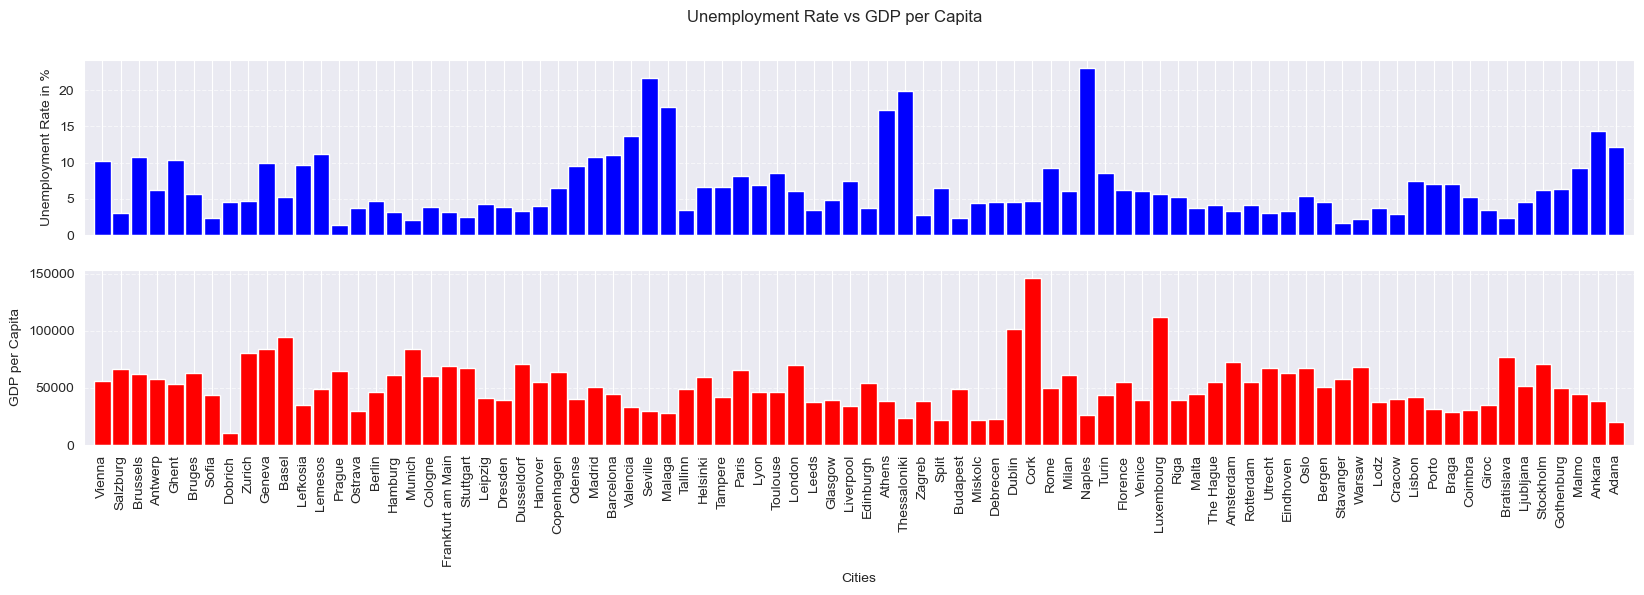

In [84]:
fig, ax  = plt.subplots(2,1, figsize=(20, 5))
labels = cities.index.get_level_values(1)
hobo = cities['Unemployment Rate']
plt.suptitle('Unemployment Rate vs GDP per Capita')
ax[0].bar(labels, hobo, width=0.9, color='b', align='center')
ax[0].set_xlim(-1, len(hobo))
ax[0].set_ylabel('Unemployment Rate in %')
ax[0].tick_params(labelbottom=False)
ax[0].grid(axis='y', linestyle='--', alpha=0.6)
broke = cities['GDP per Capita']
ax[1].bar(labels, broke, width=0.9, color='r', align='center')
ax[1].set_xlim(-1, len(broke))
ax[1].set_xlabel('Cities')
ax[1].set_ylabel('GDP per Capita')
ax[1].grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.show()

We found the barchart to be a little difficult to read so we decided to add a jointplot to plot unemployment against GDP per capita, using hexagonal bins to visualize density. Although the plot fails due to a parameter issue, the intention is clear:
to statistically validate whether higher GDP corresponds to lower unemployment.

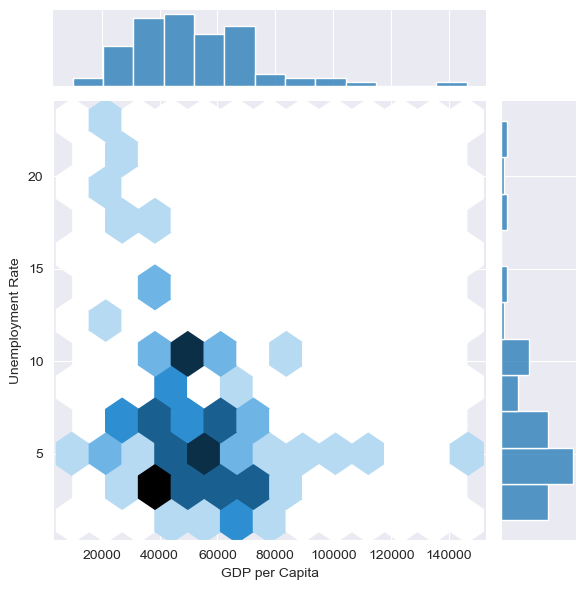

In [85]:
sns.jointplot(cities, x='GDP per Capita', y='Unemployment Rate', kind='hex')
plt.show()

To verify this relationship numerically, the code computes a correlation matrix that includes:  
-GDP per Capita,    
-Unemployment Rate

The heatmap confirms the earlier visual observation:
a negative correlation, meaning that cities with stronger economies tend to have fewer unemployed residents

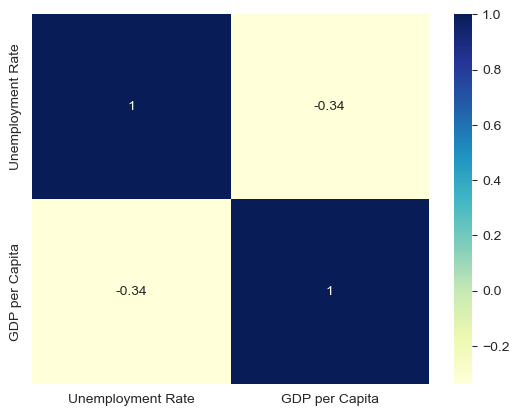

In [86]:
broke_scale = cities.loc[:, 'Unemployment Rate':'GDP per Capita']
sns.heatmap(broke_scale.corr(), annot=True, cmap='YlGnBu')
plt.show()

---

This section evaluates how much disposable income residents keep after paying essential living costs. By comparing Average Monthly Salary to the Average Cost of Living, we calculate a salary–cost gap that reveals where people enjoy the strongest financial comfort

In [26]:
rich_cities = cities.loc[:, ('Average Monthly Salary','Average Cost of Living')]
rich_cities['delta']=rich_cities['Average Monthly Salary']-cities['Average Cost of Living']
rich_cities.sort_values('delta', ascending=False, inplace=True)

We compute the difference between salary and living costs for every city and sort them to find the top five cities with the largest positive gap.
These are the places where salaries significantly exceed expenses, indicating greater purchasing power and financial ease.

A vertical line chart then visualizes the income, cost of living, and the resulting gap, clearly showing cities where residents retain the most money after necessary spending.

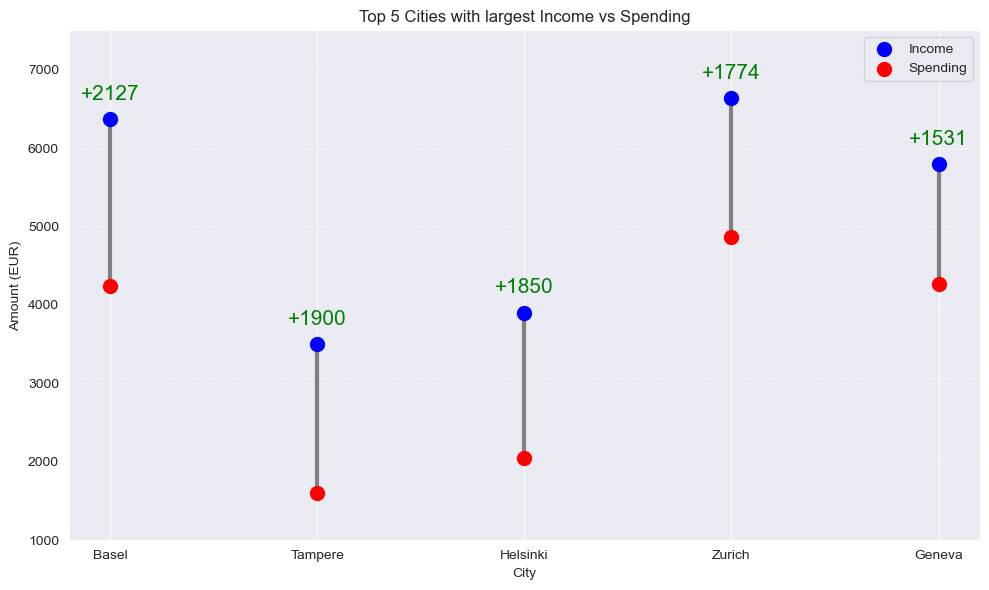

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

income = rich_cities['Average Monthly Salary'][:5]
spending = rich_cities['Average Cost of Living'][:5]
delta = rich_cities['delta'][:5]
city_names = rich_cities.index.get_level_values(1)[:5]

ax.vlines(x=city_names, ymin=spending, ymax=income, color='gray', linewidth=3)

ax.scatter(city_names, income, color='blue', s=100, label='Income', zorder=10)
ax.scatter(city_names, spending, color='red', s=100, label='Spending', zorder=10)

for i in range(5):
    ax.text(city_names[i], income.iloc[i] + 200, f"+{delta.iloc[i]}",
            ha='center', va='bottom', fontsize=15, color='green')

ax.set_ylim(1000, 7500)
ax.set_ylabel('Amount (EUR)')
ax.set_xlabel('City')
ax.set_title('Top 5 Cities with largest Income vs Spending')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


At the city level (last chart), the most favorable cities are Basel, Zurich, Geneva, Tampere, and Helsinki.
The gap between income and expenditure is greatest in these cities.
This suggests that despite the high cost of living, salaries there are even higher, providing the maximum amount of disposable income.

Next, we aggregate the salary–cost gap by country, taking the average across all cities within each country.

Two bar charts illustrate these contrasts, highlighting economic pressure points and regions where budgets are tight.

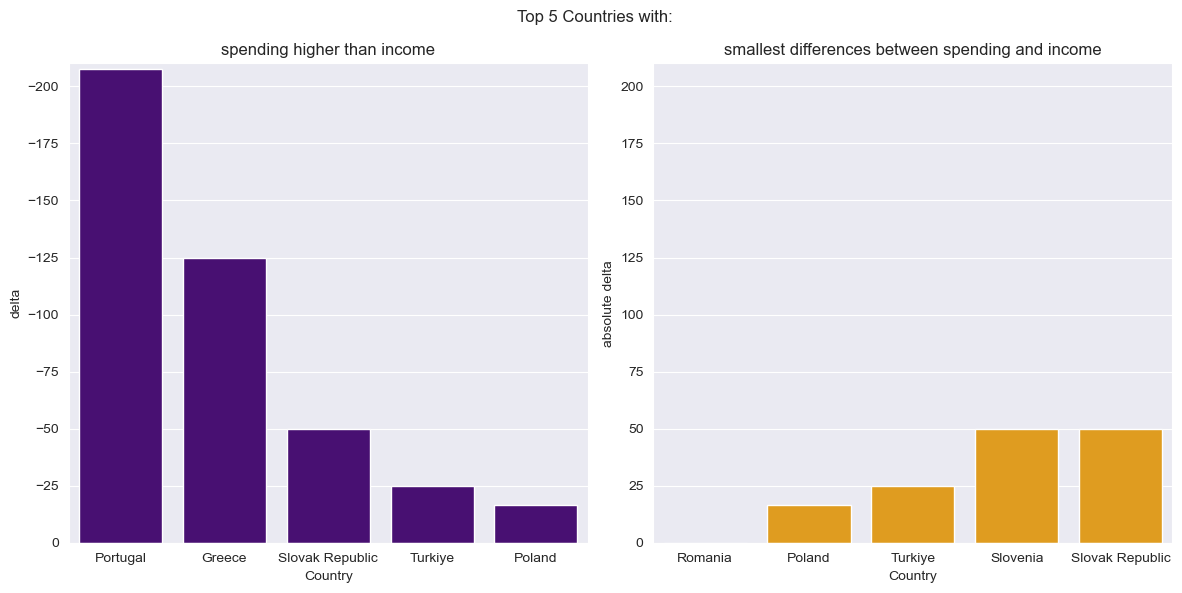

In [25]:
poor_countries = rich_cities.groupby('Country')['delta'].mean().sort_values().head(5)
poor_countries_abs = abs(rich_cities.groupby('Country')['delta'].mean()).sort_values().head(5)
fig, ax = plt.subplots(1,2,figsize=(12, 6))
sns.barplot(poor_countries, color='indigo', ax=ax[0])
sns.barplot(poor_countries_abs, color='orange', ax=ax[1])
plt.suptitle('Top 5 Countries with:')
ax[0].set_title("spending higher than income")
ax[1].set_title("smallest differences between spending and income")
ax[1].set_ylabel('absolute delta')
ax[0].set_ylim(0,-210)
ax[1].set_ylim(0,210)
plt.tight_layout()
plt.show()

The left graph shows countries where expenses exceed income on average—Portugal, Greece, Slovakia, Turkey, and Poland.
Citizens of these countries, on average, face a situation where their salaries don't cover the average cost of living, indicating economic stress and limited budgets.

The right chart shows countries with the smallest gap between expenses and income.
These include Romania, Poland, Turkey, Slovenia, and Slovakia.
Here, salaries only partially exceed the cost of living, meaning living conditions are also quite constrained, leaving little disposable income.

---

In [26]:
best_paid_cities = cities[cities['Average Monthly Salary']>2000].sort_values('Average Monthly Salary', ascending=False)
cheap_cities = best_paid_cities[best_paid_cities['Average Cost of Living']<=1600]
least_broke = cheap_cities.sort_values('Unemployment Rate')

In [27]:
fig = px.bar(data_frame=least_broke,
             x=least_broke.index.get_level_values(1),
             y='Unemployment Rate',
             hover_data={'Country': least_broke.index.get_level_values(0),
                         'Average Monthly Spending': least_broke['Average Cost of Living']},
             title='Cities with Average Monthly Income greater than €2000',
             labels={'y': 'Unemployment Rate',
                     'x': 'City'},
             color='Average Monthly Salary')
fig.update_layout(width=900,
                  height=500)

fig.show()

Low unemployment + high wages -> the most stable and attractive options for family life.
From this perspective, Dresden, Leipzig, and Tampere appear stronger than the others: they offer a good financial foundation and stability in the labor market

Cities with high unemployment, such as Malaga and Seville, while meeting salary and cost-of-living thresholds, carry greater economic risk: finding a job there is harder, which may outweigh the benefits of a high salary.

According to the data, the most balanced and safest options for living are **northern and German cities**, while southern European cities, despite high salaries, are off-putting due to high unemployment rates.

---
## 5. Three Visualizations and Insights

**Insight 1 - Bar-chart of Average Unemployment Rate by Country (color graded by Average Cost of Living):**
This graph ranks countries by their average unemployment rate, showing that Greece, Spain, and Turkey have the highest rates overall, while Poland, Czechia, and the Slovak Republic have the lowest. What's interesting is that the Average Cost of Living appears low at both ends of the spectrum, suggesting that cost of living may not have a big effect on unemployment rates as one might intuitively expect.

**Insight 2 - Heatmap of Monetary Aspects, Heat Stress Days, and Unemployment Rate:**
While the heatmap reveals several strong correlations, we focused primarily on those surrounding the Unemployment Rate. The expected inverse relationship between GDP per Capita and Unemployment Rate appears but is surprisingly weak despite being intuitively clear. Far more interesting was the significant positive correlation between Heat Stress Days and Unemployment Rate, which we explore further in the next visualization.

**Insight 3 - Scatterplot of Monthly Salary vs Unemployment Rate (color gradient for Average Heat Stress Days):**
As hinted in the heatmap, this scatterplot clearly shows a relationship between Heat Stress Days and Unemployment Rate. Countries around the Mediterranean are far more likely to have higher unemployment rates and tend to have lower monthly salaries as well, revealing a potential climate-economic connection.

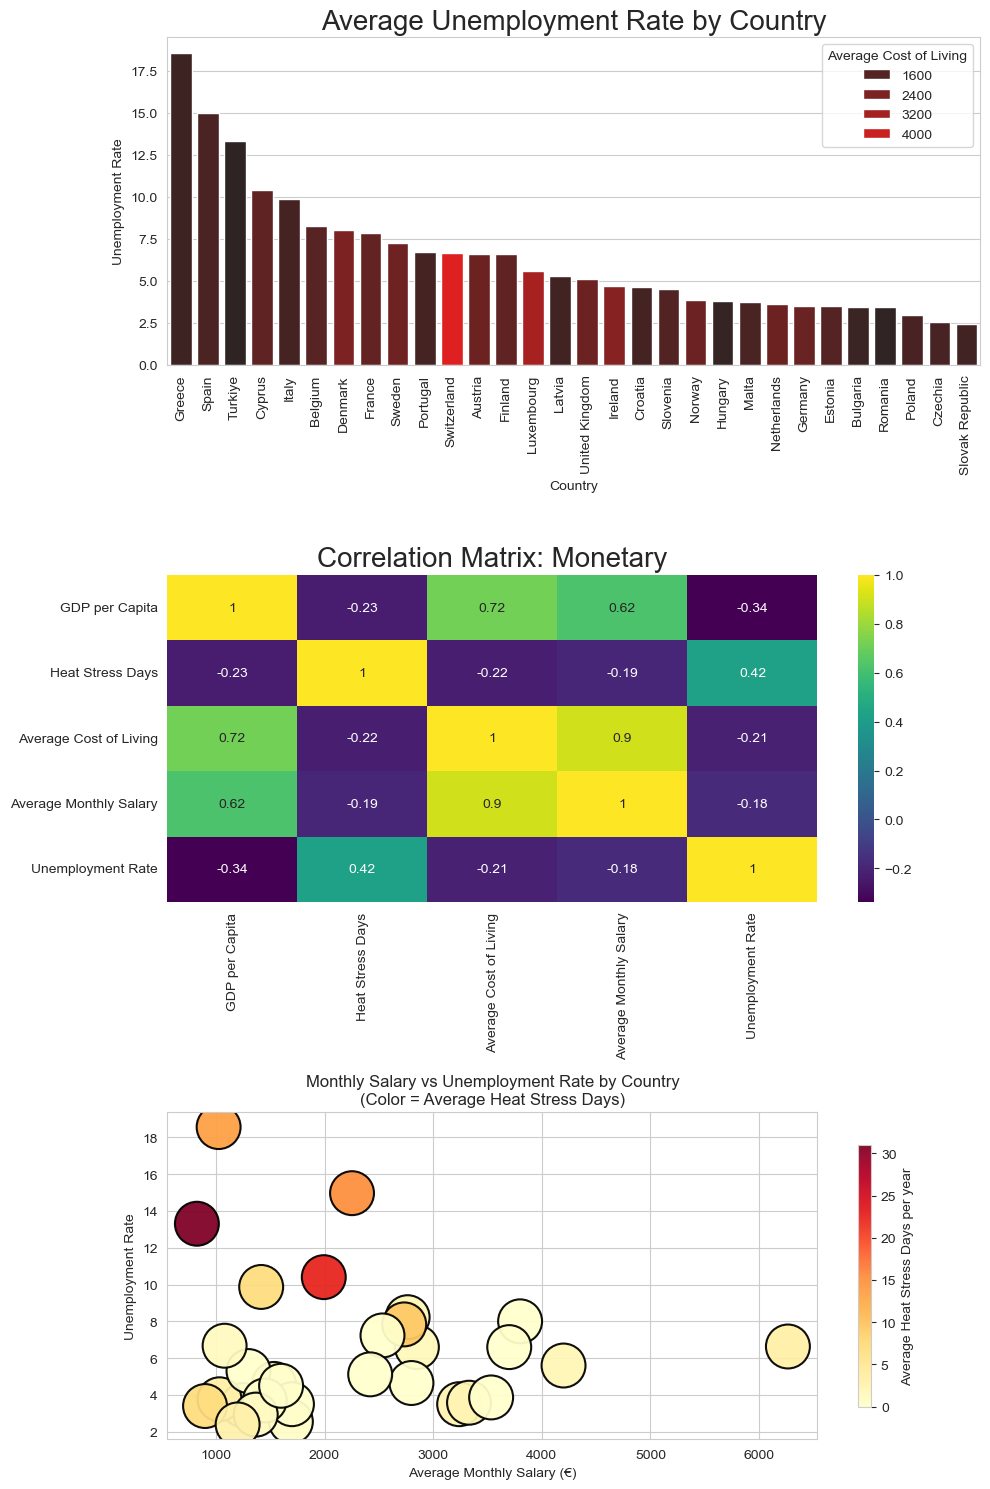

In [28]:
broke = cities.sort_values('Unemployment Rate', ascending=False)
avg_broke = broke.reset_index().groupby('Country')[['Unemployment Rate','Average Cost of Living']].mean().sort_values(by='Unemployment Rate',ascending=False)

sns.set_style('whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10, 15))

sns.barplot(
    x=avg_broke.index,
    y=avg_broke['Unemployment Rate'],
    hue=avg_broke['Average Cost of Living'],
    palette='dark:red',
    ax=ax1
)

sns.heatmap(
    cities[['GDP per Capita', 'Heat Stress Days', 'Average Cost of Living',
            'Average Monthly Salary', 'Unemployment Rate']].corr(),
    annot=True,
    cmap='viridis',
    ax=ax2
)

country_stats = cities.groupby('Country')[['Average Monthly Salary', 'Unemployment Rate', 'Heat Stress Days']].mean()

ax3.scatter(
    country_stats['Average Monthly Salary'],
    country_stats['Unemployment Rate'],
    s=1000,
    c=country_stats['Heat Stress Days'],
    cmap='YlOrRd',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.94
)

cbar = plt.colorbar(ax3.collections[0], ax=ax3, shrink=0.8)
cbar.set_label('Average Heat Stress Days per year')

ax3.set_xlabel('Average Monthly Salary (€)')
ax3.set_ylabel('Unemployment Rate')
ax3.set_title('Monthly Salary vs Unemployment Rate by Country\n(Color = Average Heat Stress Days)')

ax1.set_xticks(range(len(avg_broke)))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')
ax1.set_title('Average Unemployment Rate by Country', fontsize=20)
ax2.set_title('Correlation Matrix: Monetary', fontsize=20)

plt.tight_layout()
plt.savefig(r'three_insights.png')
plt.show()

The higher the GDP per capita -> the lower the unemployment.  
Southern Europe is hotter -> and typically poorer -> and has higher unemployment.  
Northern and Central Europe are the most economically stable regions.

Warm climates, unfortunately, correlate with:
1) lower wages  
  2) higher unemployment  
  3) less stable economy

**An Unexpected but Important Finding**  
The visualizations showed that a higher number of Heat Stress Days is strongly associated with economic activity, highlighting the emerging "climate-economic" divide in Europe:  
North -> Sustainable, wealthy, safe  
South -> Hotter, poorer, higher unemployment risk

---

# Web Scraping and Interactive Map

### **Overview**

- City coordinates were scraped from Wikipedia using Selenium, with `time.sleep()` calls added to ensure pages fully loaded before extraction and to reduce failed queries or blocking issues.
- Missing coordinates were recorded as `NaN`, and a clean DataFrame was built to store coordinates for every city.
- Rows lacking coordinates (Madrid, Leeds, Malta) were isolated for manual correction, and missing locations were completed using external sources to ensure full geospatial coverage.
- The final coordinate field was split into numeric `Latitude` and `Longitude` columns, enabling mapping and geospatial analysis.
- An interactive map was then created using Plotly to visualize the cities.

---

**Webscraping**

In [29]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
import time
from selenium.webdriver.chrome.options import Options as Options_c

In [30]:
def search_n_recover(cities):
    wikipedia_home = 'https://en.wikipedia.org/wiki/Main_Page'
    browser_c = webdriver.Chrome(options=Options_c())
    browser_c.get(wikipedia_home)
    city_coordinate_list = []
    for  city in cities:
        time.sleep(1)
        search_butt =  browser_c.find_elements(By.CSS_SELECTOR, 'a.cdx-button.cdx-button--fake-button.cdx-button--fake-button--enabled.cdx-button--weight-quiet.cdx-button--icon-only.search-toggle')
        search_butt[0].click()
        time.sleep(0.5)
        search_bar = browser_c.find_elements(By.CLASS_NAME, 'cdx-text-input__input')
        search_bar[0].send_keys(city)
        time.sleep(0.5)
        search_bar[0].send_keys(Keys.ENTER)
        time.sleep(1)
        coordinates = browser_c.find_elements(By.CSS_SELECTOR, 'table.infobox.ib-settlement.vcard')
        if len(coordinates) == 0:
            time.sleep(1)
            search_butt =  browser_c.find_elements(By.CSS_SELECTOR, 'a.cdx-button.cdx-button--fake-button.cdx-button--fake-button--enabled.cdx-button--weight-quiet.cdx-button--icon-only.search-toggle')
            search_butt[0].click()
            time.sleep(0.5)
            search_bar = browser_c.find_elements(By.CLASS_NAME, 'cdx-text-input__input')
            search_bar[0].send_keys(city+' (city)')
            time.sleep(0.5)
            search_bar[0].send_keys(Keys.ENTER)
            time.sleep(1)
            coordinates = browser_c.find_elements(By.CSS_SELECTOR, 'table.infobox.ib-settlement.vcard')
        try:
            time.sleep(0.5)
            geo_html = coordinates[0].get_attribute('innerHTML')
            city_coordinate_list.append(geo_html)
        except:
            city_coordinate_list.append(['NaN'])
            print(city, 'Coordinates not found')
    browser_c.quit()
    return city_coordinate_list

In [31]:
list_of_html = search_n_recover(cities.index.get_level_values('City'))

Leeds Coordinates not found
Split Coordinates not found
Malta Coordinates not found


After receiving the HTML code for each city
(The HTML is parsed using BeautifulSoup. The three missing
 coordinates were recorded as "NaN")

In [ ]:
city_coordinates = []

for page in list_of_html:
    if page == ['NaN']:
        city_coordinates.append('NaN')
    else:
        soup = BeautifulSoup(page, 'html.parser')

        geo = soup.find('span', class_='geo')
        if geo:
            lat, lon = geo.text.split(';')
            city_coordinates.append(lat + ', ' + lon)
        else:
            city_coordinates.append('NaN')

A table is created for all cities and we also check rows without coordinates (Madrid, Leeds, Malta).

In [33]:
coordinates_df = pd.DataFrame(city_coordinates, index=cities.index, columns=['Coordinates'])
coordinates_df[coordinates_df['Coordinates']=='NaN']

,,Coordinates
Country,City,
United Kingdom,Leeds,NaN
Croatia,Split,NaN
Malta,Malta,NaN


In [34]:
coordinates_df

Coordinates
Country City                           
Austria Vienna      48.20833,  16.37250
        Salzburg    47.80000,  13.04500
Belgium Brussels     50.84667,  4.35250
        Antwerp      51.21778,  4.40028
        Ghent        51.05361,  3.72528
...                                 ...
Sweden  Stockholm   59.32944,  18.06861
        Gothenburg  57.70750,  11.96750
        Malmo       55.60583,  13.03583
Turkiye Ankara      39.92889,  32.85472
        Adana         37.000,  35.32133

[84 rows x 1 columns]

Since three cities were not found automatically they were added manually from:

In [ ]:
coordinates_df = coordinates_df.sort_index()

coordinates_df.loc[("Spain", "Madrid"), "Coordinates"] = "40.2085, -3.713"
coordinates_df.loc[("United Kingdom", "Leeds"), "Coordinates"] = "53.79648, -1.54785"
coordinates_df.loc[("Malta", "Malta"), "Coordinates"] = "35.944, 14.3795"

Splitting coordinates into Latitude and Longitude

In [36]:
coords_split = coordinates_df["Coordinates"].str.split(",", expand=True)

coordinates_df["Latitude"] = coords_split[0].astype(float)
coordinates_df["Longitude"] = coords_split[1].astype(float)

coordinates_df.loc[[("Spain", "Madrid"),
                    ("United Kingdom", "Leeds"),
                    ("Malta", "Malta")]]

,,Coordinates,Latitude,Longitude
Country,City,,,
Spain,Madrid,"40.2085, -3.713",40.20850,-3.71300
United Kingdom,Leeds,"53.79648, -1.54785",53.79648,-1.54785
Malta,Malta,"35.944, 14.3795",35.94400,14.37950


Merging coordinates with the `cities` dataframe.

In [ ]:
cities_reset = cities.reset_index()
coords_reset = coordinates_df[["Latitude", "Longitude"]].reset_index()

full_df = cities_reset.merge(
    coords_reset,
    on=["Country", "City"],
    how="left"
)

full_df.head()

---
### Creating an Interactive Economic Map of Europe

To visualize the balance between earning potential and daily expenses across the continent, we have developed an interactive map using the **Natural Earth** projection. This visualization goes beyond simple geography, acting as a tool for comparative economic analysis to identify where one can live most comfortably.

By interacting with specific regions, users can reveal a comprehensive layer of data that contextualizes the standard of living. Hovering over a country instantly displays critical metrics such as **Population**, **Unemployment Rate**, and **GDP per Capita**, alongside personal finance indicators like **Average Monthly Salary** and **Average Cost of Living**.

This simultaneous display allows for immediate insight: it highlights not just where salaries are highest, but where purchasing power is maximized relative to the local cost of living and job market stability.

In [ ]:
import plotly.io as pio

pio.renderers.default = "notebook"

fig = px.scatter_geo(
    full_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    hover_data={
        "Country": True,
        "Population": True,
        "Unemployment Rate": True,
        "GDP per Capita": True,
        "Average Monthly Salary": True,
        "Average Cost of Living": True,
    },
    color="Average Monthly Salary",
    scope="europe",
    projection="natural earth"
)

fig.update_layout(
    title="Where Should I Live? — Interactive Map of European Cities",
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

## **Final Summary**

### **For those seeking financial stability and strong career prospects**
#### **Northern and Central Europe**

**Switzerland (Basel, Zurich, Geneva)** — the highest salaries and strongest earnings potential  
**Finland (Tampere, Helsinki)** — excellent salary–cost balance  
**Germany (Dresden, Leipzig)** — affordable, stable, and reliable economic conditions

### **For those who value family life and a peaceful environment**
**Tampere, Dresden, Leipzig**
* low unemployment
* good environmental quality and safety
* reasonable living costs

### **For those who prioritize climate and lifestyle (but not maximum economic stability)**
**Spain (Valencia, Malaga, Seville)**
* mild, comfortable climate
* relatively affordable cost of living
  **but high unemployment risk**

### **For budget-conscious individuals**
**Poland, Czechia, Slovakia**
* low living expenses
* but also comparatively lower salaries

### **For those who want overall balance rather than extremes**
**Austria, Belgium, the Netherlands**
* moderate unemployment
* solid salary levels
* strong social protection systems


### As a result:

- **For career and finances** – Northern and Central Europe.
- **For family** – Germany and Scandinavia.
- **For climate and lifestyle** – Spain and Portugal (with economic caveats).

---

# City/Country Dashboard: A quick analytical overview of a countries most important features


In [87]:
class Dashboard(tk.Tk):
    def __init__(self, df):
        super().__init__()

        self.df = df.reset_index()
        self.title("Where Should you Live?")
        self.geometry("950x750")

        # --- Main Title ---
        tk.Label(
            self,
            text="What Metrics are you interested in?",
            font=("Arial", 15)
        ).pack(pady=10)

        # --- Top Control Panel ---
        self.top_panel = tk.Frame(self)
        self.top_panel.pack(fill="x", padx=20, pady=10)

        # --- Data Prep ---
        self.countries = ['Filter by Country', 'Filter by City'] + sorted(self.df["Country"].unique().tolist())
        self.metrics = {
            "Sunny Weather": "Heat Stress Days",
            "Unemployment": "Unemployment Rate",
            "Population": "Population",
            "Population Density": "Population Density",
            "Economy": "GDP per Capita",
            "Income": "Average Monthly Salary",
            "Rent": "Average Rent Price",
            "Expenses": "Average Cost of Living"
        }
        metrics_list = list(self.metrics.keys())

        # --- COLUMN 0: Country & Toggle/Spinbox ---
        self.country_frame = tk.Frame(self.top_panel)
        self.country_frame.grid(row=0, column=0, padx=10, sticky="n")

        self.dropdown_countries = ttk.Combobox(
            self.country_frame, values=self.countries, state="readonly", width=25
        )
        self.dropdown_countries.set("Filter by Country")
        self.dropdown_countries.pack(anchor="w")
        self.dropdown_countries.bind("<<ComboboxSelected>>", self.toggle_spinbox)

        # Horizontal Row for Rank Button + Spinbox
        self.controls_row = tk.Frame(self.country_frame)
        self.controls_row.pack(anchor="w", pady=(5, 0))

        self.rank_mode = tk.StringVar(value="Top")
        self.rank_button = tk.Button(
            self.controls_row, text="Top", width=8, command=self.toggle_rank
        )
        self.rank_button.pack(side="left")

        self.top_n_value = tk.IntVar(value=10)
        self.spinbox = tk.Spinbox(
            self.controls_row, from_=3, to=30, width=4,
            textvariable=self.top_n_value, state="normal"
        )
        self.spinbox.pack(side="left", padx=5)

        # --- COLUMN 1: Primary Metric ---
        self.metric_frame = tk.Frame(self.top_panel)
        self.metric_frame.grid(row=0, column=1, padx=10, sticky="n")

        self.dropdown_metric = ttk.Combobox(
            self.metric_frame, values=metrics_list, state="readonly", width=25
        )
        self.dropdown_metric.set("Choose Metric")
        self.dropdown_metric.pack(anchor="w")

        # --- COLUMN 2: Secondary Metric (Hue) ---
        self.axis_frame = tk.Frame(self.top_panel)
        self.axis_frame.grid(row=0, column=2, padx=10, sticky="n")

        self.dropdown_hue = ttk.Combobox(
            self.axis_frame, values=['None'] + metrics_list, state="readonly", width=15
        )
        self.dropdown_hue.set("None")
        self.dropdown_hue.pack(anchor="w")

        # --- COLUMN 3: Update Button ---
        tk.Button(
            self.top_panel, text="Update", width=10, bg="#4CAF50", fg="white",
            command=self.plot_graph
        ).grid(row=0, column=3, padx=10, sticky="n")

        # --- Plot Container ---
        self.plot_container = tk.Frame(
            self, bg="white", highlightbackground="gray", highlightthickness=1
        )
        self.plot_container.pack(expand=True, fill="both", padx=20, pady=20)

        self.placeholder_label = tk.Label(
            self.plot_container, text="Select a Metric and click Update",
            fg="gray", bg="white"
        )
        self.placeholder_label.pack(expand=True)

        self.canvas = None

    def toggle_spinbox(self, event=None):
        """Enables spinbox only for global filters."""
        selection = self.dropdown_countries.get()
        if selection in ["Filter by Country", "Filter by City"]:
            self.spinbox.config(state="normal")
        else:
            self.spinbox.config(state="disabled")

    def toggle_rank(self):
        """Switches the sort order and button label."""
        new_mode = "Bottom" if self.rank_mode.get() == "Top" else "Top"
        self.rank_mode.set(new_mode)
        self.rank_button.config(text=new_mode)

    def bar_chart(self, x, y, title, ylabel, rotation=0, hue_values=None):
        """Internal Seaborn plotting logic."""
        fig = Figure(figsize=(9, 5), dpi=100)
        ax = fig.add_subplot(111)

        # Convert Pandas data to lists to avoid UI threading issues
        x_list = list(x)
        y_list = list(y)

        if hue_values is not None:
            h_list = list(hue_values)
            sns.barplot(x=x_list, y=y_list, hue=h_list, ax=ax, palette="viridis")
            ax.legend(title=self.dropdown_hue.get(), bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            sns.barplot(x=x_list, y=y_list, ax=ax, color="skyblue")

        ax.set_title(title, fontsize=12, pad=10)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis="x", rotation=rotation)

        fig.tight_layout()
        return fig

    def plot_graph(self):
        """Main logic for data filtering and rendering."""
        country_sel = self.dropdown_countries.get()
        metric_key = self.dropdown_metric.get()
        hue_key = self.dropdown_hue.get()

        if metric_key not in self.metrics:
            return

        if self.canvas:
            self.canvas.get_tk_widget().destroy()

        self.placeholder_label.pack_forget()

        main_col = self.metrics[metric_key]
        hue_col = self.metrics.get(hue_key)

        is_descending = (self.rank_mode.get() == "Top")
        top_n = self.top_n_value.get()

        try:
            if country_sel == "Filter by Country":
                # Group by country and average the metrics
                agg_cols = [main_col]
                if hue_col: agg_cols.append(hue_col)
                data = self.df.groupby("Country")[agg_cols].mean().sort_values(
                    by=main_col, ascending=not is_descending
                ).head(top_n)
                x, y = data.index, data[main_col]
                h = data[hue_col] if hue_col else None
                title = f"{self.rank_mode.get()} {top_n} Countries by {metric_key}"

            elif country_sel == "Filter by City":
                # Look at all cities globally
                data = self.df.sort_values(
                    by=main_col, ascending=not is_descending
                ).head(top_n)
                x, y = data["City"], data[main_col]
                h = data[hue_col] if hue_col else None
                title = f"{self.rank_mode.get()} {top_n} Cities Globally by {metric_key}"

            else:
                # Specific country view (all cities in that country)
                data = self.df[self.df["Country"] == country_sel].sort_values(
                    by=main_col, ascending=not is_descending
                )
                x, y = data["City"], data[main_col]
                h = data[hue_col] if hue_col else None
                title = f"{metric_key} in {country_sel}"

            # Finalize and Draw
            fig = self.bar_chart(x, y, title, metric_key, rotation=45, hue_values=h)
            self.canvas = FigureCanvasTkAgg(fig, master=self.plot_container)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack(expand=True, fill="both")

        except Exception as e:
            self.placeholder_label.config(text=f"Plot Error: {e}")
            self.placeholder_label.pack(expand=True)

In [88]:
%gui tk
Dashboard(cities)

<__main__.Dashboard object .>